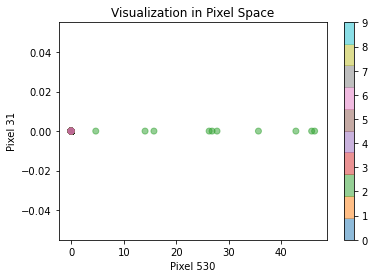

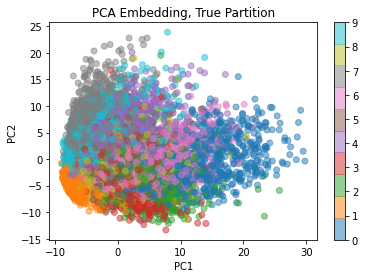

Running t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.709s...
[t-SNE] Computed neighbors for 10000 samples in 139.393s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.196350
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.675827
[t-SNE] KL divergence after 1000 iterations: 1.735045


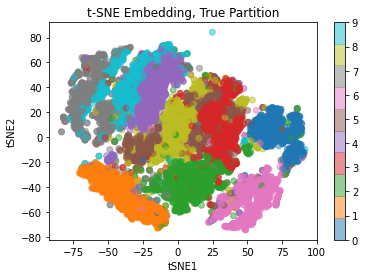

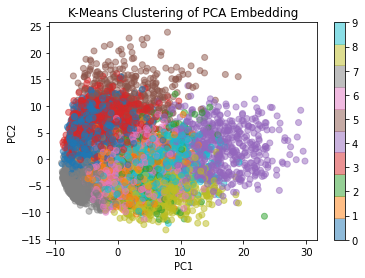

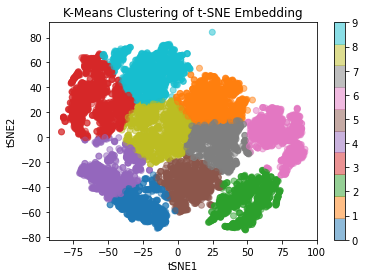

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import struct
import os

# Function to read MNIST dataset from local files
def process_mnist_data(image_file, label_file):
    with open(label_file, 'rb') as lbl:
        magic, num = struct.unpack('>II', lbl.read(8))
        labels = np.frombuffer(lbl.read(), dtype=np.uint8)
    
    with open(image_file, 'rb') as img:
        magic, num, rows, cols = struct.unpack('>IIII', img.read(16))
        images = np.frombuffer(img.read(), dtype=np.uint8).reshape(num, rows * cols)
    
    return images, labels

# Load MNIST data (Ensure files are locally available)
image_file = 't10k-images.idx3-ubyte'
label_file = 't10k-labels.idx1-ubyte'

if not os.path.exists(image_file) or not os.path.exists(label_file):
    raise FileNotFoundError("MNIST dataset files not found. Please download and place 't10k-images.idx3-ubyte' and 't10k-labels.idx1-ubyte' in the working directory.")

X, y = process_mnist_data(image_file, label_file)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize data in pixel space
plt.figure()
plt.scatter(X_scaled[:, 530], X_scaled[:, 31], c=y, cmap='tab10', alpha=0.5)
plt.title('Visualization in Pixel Space')
plt.xlabel('Pixel 530')
plt.ylabel('Pixel 31')
plt.colorbar()
plt.show()

# PCA transformation
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualize data in PCA space
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.title('PCA Embedding, True Partition')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

# t-SNE transformation with verbose iteration output
def tsne_callback(iteration, error):
    print(f"t-SNE Iteration {iteration}: KL Divergence = {error}")

print("Running t-SNE...")
tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=42, verbose=1)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE embedding
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.5)
plt.title('t-SNE Embedding, True Partition')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.colorbar()
plt.show()

# K-Means Clustering on PCA Space
K = 10
nPCA = 149  # Cumulative variance of 95%
kmeans_pca = KMeans(n_clusters=K, random_state=42, n_init=10)
y_hat_pca = kmeans_pca.fit_predict(X_pca[:, :nPCA])

# Visualize K-Means clustering in PCA space
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hat_pca, cmap='tab10', alpha=0.5)
plt.title('K-Means Clustering of PCA Embedding')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

# K-Means Clustering on t-SNE Space
kmeans_tsne = KMeans(n_clusters=K, random_state=42, n_init=10)
y_hat_tsne = kmeans_tsne.fit_predict(X_tsne)

# Visualize K-Means clustering in t-SNE space
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_hat_tsne, cmap='tab10', alpha=0.5)
plt.title('K-Means Clustering of t-SNE Embedding')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.colorbar()
plt.show()
